In [2]:
import pandas as pd
import os
import s3fs # for reading from S3FileSystem
import json # for working with JSON files 

import matplotlib.pyplot as plt

pd.set_option('max_colwidth', -1)

In [3]:
df = pd.read_csv('restructure_single_labels.csv')
df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,img_id,present_ramp,missing_ramp,obstacle,surface_prob,no_sidewalk,null,sv_image_x,sv_image_y,sv_image_y_bottom_origin,label_name
0,680_45.jpg,49558,{},3,0,"{""name"":""point"",""cx"":108,""cy"":389}","{""Present Curb Ramp"":""1\n""}",680,True,False,False,False,False,False,108,389,251,Present Curb Ramp
1,680_45.jpg,49558,{},3,1,"{""name"":""point"",""cx"":160,""cy"":389}","{""Present Curb Ramp"":""1""}",680,True,False,False,False,False,False,160,389,251,Present Curb Ramp
2,680_45.jpg,49558,{},3,2,"{""name"":""point"",""cx"":607,""cy"":453}","{""Present Curb Ramp"":""1""}",680,True,False,False,False,False,False,607,453,187,Present Curb Ramp
3,680_135.jpg,51194,{},6,0,"{""name"":""point"",""cx"":18,""cy"":475}","{""Present Curb Ramp"":""1""}",680,True,False,False,False,False,False,18,475,165,Present Curb Ramp
4,680_135.jpg,51194,{},6,1,"{""name"":""point"",""cx"":245,""cy"":413}","{""Present Curb Ramp"":""1""}",680,True,False,False,False,False,False,245,413,227,Present Curb Ramp


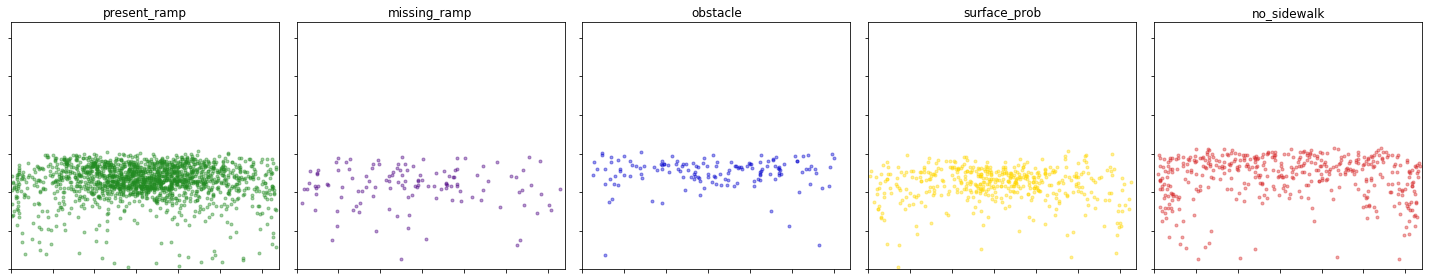

In [6]:
fig = plt.figure(figsize = (20, 4))
feature_cols = ['present_ramp', 'missing_ramp', 'obstacle', 'surface_prob', 'no_sidewalk', 'null']

colors_list = ['forestgreen', 'indigo', 'mediumblue', 'gold', 'tab:red']

for index in range(5):
    ax = fig.add_subplot(1, 5, int(index+1))
    column_name = feature_cols[index]
    x = df['sv_image_x'].loc[df[column_name]]
    y = df['sv_image_y_bottom_origin'].loc[df[column_name]]
    ax.plot(x, y, marker = '.', ls = 'none', alpha = 0.4, color = colors_list[index])
    plt.ylim(0, 640)
    plt.xlim(0, 640)
    plt.title(column_name)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.tight_layout()

# Look at X Distribution

In [7]:
df['sv_image_x'].describe()

count    2851.000000
mean     315.844967 
std      152.674854 
min      2.000000   
25%      208.500000 
50%      317.000000 
75%      422.000000 
max      634.000000 
Name: sv_image_x, dtype: float64

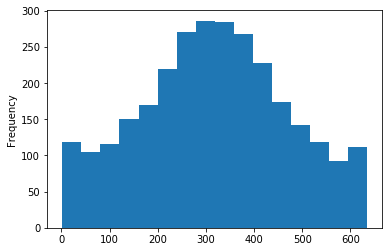

In [9]:
df['sv_image_x'].plot('hist', bins = 16) # Each is about 40 pixels wide

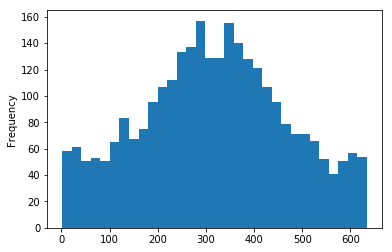

In [15]:
df['sv_image_x'].plot('hist', bins = 32) # Each about 20 pixels wide

# Look at Y Distribution

In [17]:
df['sv_image_y'].describe(percentiles = [.25, .5, .75, .9, .95])
# All between 640 and 325 - so 315

count    2851.000000
mean     410.083129 
std      47.643785  
min      325.000000 
25%      377.000000 
50%      404.000000 
75%      430.000000 
90%      467.000000 
95%      498.000000 
max      634.000000 
Name: sv_image_y, dtype: float64

In [20]:
# Consider 180 to 200 tall images to capture from like 315 to 505-ish
498- 325 

173

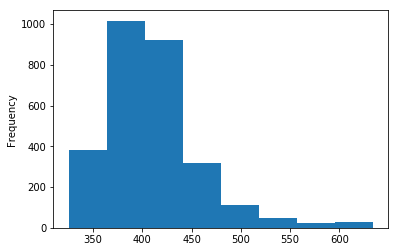

In [14]:
df['sv_image_y'].plot('hist', bins = 8) # Each bin about 40 pixels wide

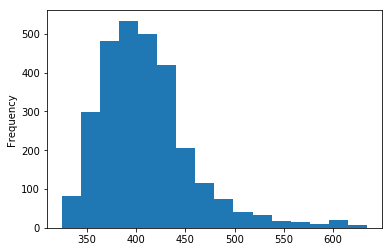

In [19]:
df['sv_image_y'].plot('hist', bins = 16) # Each bin about 20 pixels wide

# Only Present

In [22]:
df_present = df.loc[df['present_ramp']]
df_present['sv_image_x'].describe(percentiles = [.25, .5, .75, .9, .95])

count    1677.000000
mean     320.679189 
std      140.153248 
min      2.000000   
25%      226.000000 
50%      321.000000 
75%      415.000000 
90%      508.000000 
95%      560.000000 
max      634.000000 
Name: sv_image_x, dtype: float64